In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import string

In [3]:
s = "hello! world, you: are: l;"
s.translate(str.maketrans('', '', string.punctuation))

'hello world you are l'

In [4]:
# All games with metascore
metacritic_header = "https://www.metacritic.com/browse/game/"
year_range = "?releaseYearMin=2010&releaseYearMax=2024&page="

In [5]:
metacritic_header_game_page = "https://www.metacritic.com"
def scrape_metacritic_game_page(game_name: str, link: str):
    url = metacritic_header_game_page + link
    # print(url)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.content, 'html.parser')

    critic_score = None
    colors = ['red', 'yellow', 'green']
    font_color = ['g-color-white', 'g-color-gray90', 'g-color-gray90']
    score_template = "c-siteReviewScore u-flexbox-column u-flexbox-alignCenter u-flexbox-justifyCenter g-text-bold c-siteReviewScore_{color} {font} c-siteReviewScore_large"
    for c, f in zip(colors, font_color):
        score_class = score_template.format(color=c, font=f)
        score_div = soup.find('div', {'class': score_class})
        if score_div:
            critic_score = score_div.find('span').text.strip()
            break

    
    platform_div = soup.find('div', {'class': 'c-gameDetails_Platforms u-flexbox u-flexbox-row'})
    platforms_list = list(map(lambda x: x.text.strip(), platform_div.find_all('li'))) if platform_div else None
    
    release_div = soup.find('div', {'class': 'c-gameDetails_ReleaseDate u-flexbox u-flexbox-row'})
    release_date = release_div.find_all('span')[1].text if release_div else None
    
    developer_div = soup.find('div', {'class': 'c-gameDetails_Developer u-flexbox u-flexbox-row'})
    developer_list = list(map(lambda x: x.text.strip(), developer_div.find_all('li'))) if developer_div else None
    
    publisher_div = soup.find('div', {'class': 'c-gameDetails_Distributor u-flexbox u-flexbox-row'})
    publisher = publisher_div.find_all('span')[1].text if publisher_div else None
    
    genres_div = soup.find('div', {'class': 'c-gameDetails_sectionContainer u-flexbox u-flexbox-row u-flexbox-alignBaseline'})
    genres_list = list(map(lambda x: x.text.strip(), genres_div.find_all('li'))) if genres_div else None

    data = {"Title": game_name,
            "Score": critic_score,
            "Platforms": platforms_list,
            "Release Date": release_date,
            "Developers": developer_list,
            "Publisher": publisher,
            "Genres": genres_list}
    return data

In [6]:
def scrape_metacritic_page(page_no: str):
    assert page_no.isnumeric()
    url = metacritic_header + year_range + page_no
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.content, 'html.parser')
    game_divs = soup.find_all('div', {'class': 'c-finderProductCard c-finderProductCard-game'})
    links = []
    for div in game_divs:
        links.append(div.find('a').get('href'))
    
    games = soup.find_all('h3', {'class': 'c-finderProductCard_titleHeading'})
    
    titles = []
    for game in games:
        titles.append(game.find_all('span')[1].text.strip())
    
    df = []
    for title, link in zip(titles, links):
        df.append(scrape_metacritic_game_page(title, link))
    df = pd.DataFrame(df)
    return df

In [7]:
metacritic_save_file = 'metacritic_2010_2024.csv'
    
for i in range(265, 334):
    try:
        new_data = scrape_metacritic_page(str(i))   
        new_data.to_csv(metacritic_save_file, mode='a', index=False, header=False)
        print(f"Scrapped page {i}")
    except Exception as e:
        print(f"An error occurred while scraping Metacritic page {i}: {str(e)}")
        continue

Scrapped page 265
Scrapped page 266
Scrapped page 267
Scrapped page 268
Scrapped page 269
Scrapped page 270
Scrapped page 271
Scrapped page 272
Scrapped page 273
Scrapped page 274
Scrapped page 275
Scrapped page 276
Scrapped page 277
Scrapped page 278
Scrapped page 279
Scrapped page 280
Scrapped page 281
Scrapped page 282
Scrapped page 283
Scrapped page 284
Scrapped page 285
Scrapped page 286
Scrapped page 287
Scrapped page 288
Scrapped page 289
Scrapped page 290
Scrapped page 291
Scrapped page 292
Scrapped page 293
Scrapped page 294
Scrapped page 295
Scrapped page 296
Scrapped page 297
Scrapped page 298
Scrapped page 299
Scrapped page 300
Scrapped page 301
Scrapped page 302
Scrapped page 303
Scrapped page 304
Scrapped page 305
Scrapped page 306
Scrapped page 307
Scrapped page 308
Scrapped page 309
Scrapped page 310
Scrapped page 311
Scrapped page 312
Scrapped page 313
Scrapped page 314
Scrapped page 315
Scrapped page 316
Scrapped page 317
Scrapped page 318
Scrapped page 319
Scrapped p

In [12]:
df = pd.read_csv('metacritic_2010_2024.csv')

In [16]:
print(df[df['Score'] == 87.0].to_string())

                                                                       Title  Score                                                                                          Platforms  Release Date                        Developers                               Publisher                      Genres
310                                                   Rocksmith 2014 Edition   87.0                                   ['Xbox 360', 'PlayStation 3', 'PC', 'PlayStation 4', 'Xbox One']  Oct 22, 2013                       ['Ubisoft']                                 Ubisoft                  ['Rhythm']
311                             Guacamelee! Super Turbo Championship Edition   87.0                        ['PlayStation 4', 'Wii U', 'Xbox 360', 'Xbox One', 'PC', 'Nintendo Switch']   Jul 1, 2014              ['DrinkBox Studios']                        DrinkBox Studios            ['Metroidvania']
312                                                               Subnautica   87.0       ['PC', 'Xbox 

In [4]:
display(df)

,Title,Score,Platforms,Release Date,Developers,Publisher,Genres
0,Super Mario Galaxy 2,97.0,['Wii'],"May 23, 2010",['Nintendo EAD Tokyo'],Nintendo,['3D Platformer']
1,The Legend of Zelda: Breath of the Wild,97.0,"['Wii U', 'Nintendo Switch']","Mar 3, 2017",['Nintendo'],Nintendo,['Open-World Action']
2,Red Dead Redemption 2,97.0,"['Xbox One', 'PlayStation 4', 'PC']","Oct 26, 2018",['Rockstar Games'],Rockstar Games,['Open-World Action']
3,Grand Theft Auto V,97.0,"['PlayStation 3', 'Xbox 360', 'PlayStation 4',...","Nov 18, 2014",['Rockstar North'],Rockstar Games,['Open-World Action']
4,Super Mario Odyssey,97.0,['Nintendo Switch'],"Oct 27, 2017",['Nintendo'],Nintendo,['3D Platformer']
...,...,...,...,...,...,...,...
8010,Double Dragon II: Wander of the Dragons,17.0,['Xbox 360'],"Apr 5, 2013",['Gravity'],CFK,"[""2D Beat-'Em-Up""]"
8011,Vroom in the Night Sky,17.0,['Nintendo Switch'],"Apr 5, 2017",['Poisoft'],Poisoft,['Biking']
8012,Family Party: 30 Great Games Obstacle Arcade,11.0,['Wii U'],"Dec 4, 2012","['Art Co., Ltd.']",D3Publisher,['Party']
8013,Dragon Age: The Veilguard,NaN,"['PC', 'PlayStation 5', 'Xbox Series X']","Oct 31, 2024",['BioWare'],Electronic Arts,['Western RPG']


In [5]:
year_df = pd.DataFrame()
year_df['year'] = pd.to_datetime(df['Release Date'], format="%b %d, %Y").dt.year

In [6]:
year_df

,year
0,2010.0
1,2017.0
2,2018.0
3,2014.0
4,2017.0
...,...
8010,2013.0
8011,2017.0
8012,2012.0
8013,2024.0


In [7]:
year_distribution = year_df.groupby('year').size()

In [8]:
year_distribution

year
1998.0      1
2005.0      1
2008.0      1
2010.0    534
2011.0    553
2012.0    526
2013.0    483
2014.0    500
2015.0    554
2016.0    587
2017.0    636
2018.0    633
2019.0    555
2020.0    605
2021.0    541
2022.0    460
2023.0    486
2024.0    357
dtype: int64

<Axes: >

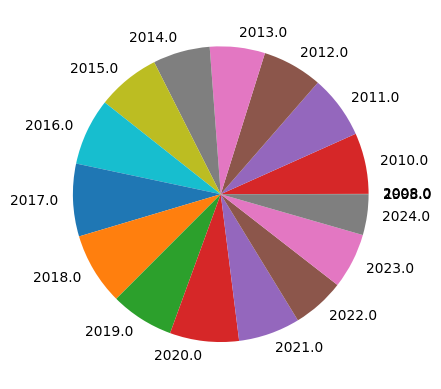

In [28]:
year_distribution.plot.pie()